In [10]:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np

In [2]:
data = load_diabetes()

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
feature = data.data
target = data.target

## Splite data set into train and test

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, random_state=45)

## Calculating Loss from Linear regression

In [7]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()
l_model.fit(xtrain, ytrain)

LinearRegression()

In [8]:
ypredict = l_model.predict(xtest)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score eror:      ', r2_score(ytest, ypredict))
print('Mean Squared Error: ', np.sqrt(mean_squared_error(ytest, ypredict)))

R2 Score eror:       0.5188113124539249
Mean Squared Error:  48.72713760953252


# -------------------------------------------------------------------------------------------

## Check same Error with Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=0.0001)
r_model.fit(xtrain, ytrain)

Ridge(alpha=0.0001)

In [18]:
ypred = r_model.predict(xtest)

In [19]:
print('R2 Score eror:      ', r2_score(ytest, ypred))
print('Mean Squared Error: ', np.sqrt(mean_squared_error(ytest, ypred)))

R2 Score eror:       0.5189732635884952
Mean Squared Error:  48.71893700181955


# -------------------------------------------------------------------------------------------

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

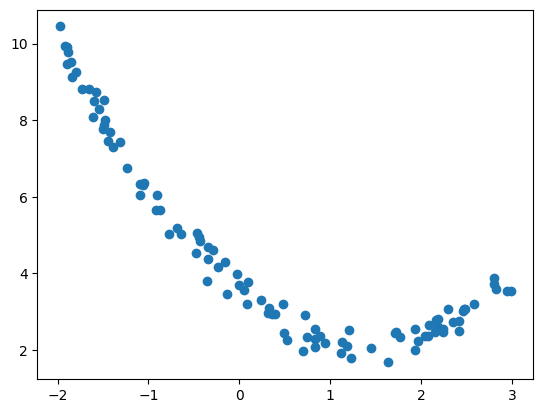

In [23]:
m=100
x1=5*np.random.rand(m,1)-2
x2 = 0.7*x1**2-2*x1+3+np.random.rand(m,1)
plt.scatter(x1,x2);

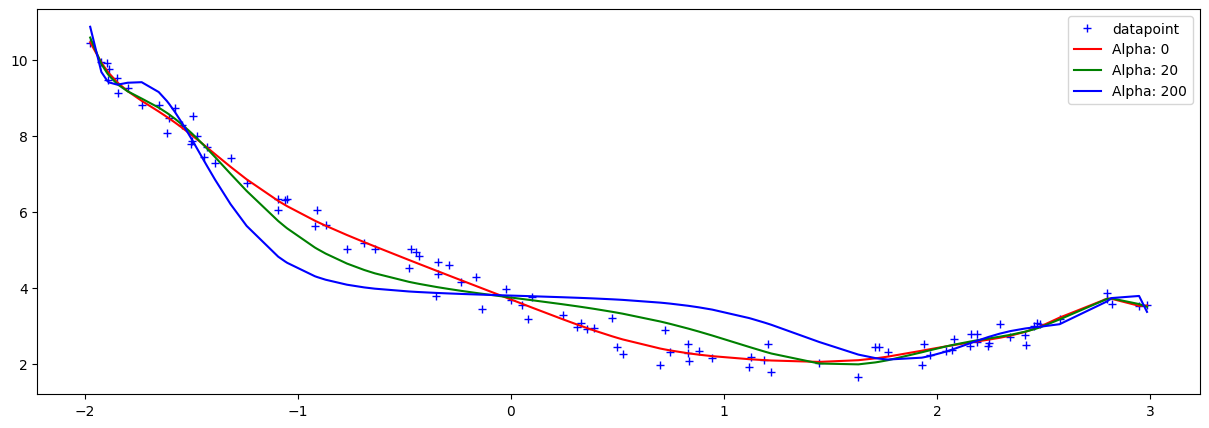

In [31]:
def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)
alphas = [0,20,200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(15,5))
plt.plot(x1, x2, 'b+', label='datapoint')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])],c, label='Alpha: {}'.format(alpha))
plt.legend()
plt.show()